##Generation de graph

Liste des points : [(2500.0, 2500.0), (550, 2939), (2856, 3629), (493, 926), (4182, 4875), (3060, 3031), (3999, 861), (3591, 3267), (1312, 2972), (4549, 1018), (3539, 3847), (3578, 4502), (1817, 950), (4593, 4876), (1121, 1859), (2919, 686), (1374, 4288), (4395, 1899), (1681, 1259), (1455, 4834), (3397, 4787), (476, 4044), (635, 1495), (3890, 2877), (4283, 572), (3928, 1598), (433, 2404), (1096, 901), (1089, 3736), (1523, 413), (2188, 454), (460, 3970), (2953, 1627), (1279, 1053), (3246, 3333), (2887, 2452), (4520, 1635), (663, 2770), (2844, 2995), (3813, 1776), (1302, 1571), (4133, 2157), (2018, 2629), (2865, 1540), (330, 3357), (1089, 1397), (2194, 3257), (875, 1030), (2616, 4250), (3517, 3812), (3, 4624), (1421, 4396), (2928, 2800), (1178, 615), (4334, 1567), (1016, 1156), (1071, 735), (609, 3432), (2012, 2975), (2811, 1356), (4069, 1263), (1178, 1733), (2852, 3373), (3117, 976), (3395, 2524), (2438, 807), (4873, 1111), (3278, 508), (1145, 2322), (4329, 93), (3903, 226), (569, 2870)

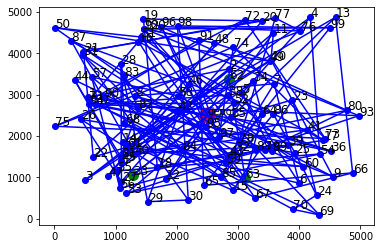

In [270]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1

            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 100
nbvoisins = 3
nbPackages = 3

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
package = randomPackages(nbPackages, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


## generation de solution aléatoire

In [271]:
def generateSolution(matrix,package):

    packageLeft = package.copy()
    solution = [0]

    #print("Package : ", packageLeft)

    while(packageLeft):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
        if(randomNext in packageLeft):
            packageLeft.remove(randomNext)
    #print("Solution : ",solution)

    return solution


def solutionLength(solution):

    totalLength = 0
    for i in range(0,len(solution)-1):
        totalLength += matrix[solution[i]][solution[i+1]]

    return totalLength

def generatePopulation(matrix,package):

    population = []
    for i in range(100):

        population.append(generateSolution(matrix,package))
        #print(population[i])
        #print(solutionLength(population[i]))

    return population

UniqueRandomSolution = generateSolution(matrix, package)
print(UniqueRandomSolution)

[0, 100, 69, 68, 69, 100, 69, 68, 69, 68, 28, 27, 26, 27, 20, 27, 26, 25, 86, 87, 86, 87, 40, 87, 40, 41, 40, 41, 17, 16, 17, 16, 71, 72, 71, 72, 73, 72, 73, 74, 75, 73, 75, 76, 96, 97, 98, 30, 29, 46, 29, 46, 45, 44, 45, 44, 81, 80, 79, 56, 57, 56, 55, 56, 79, 80, 19, 80, 19, 80, 81, 80, 19, 18, 26, 18, 19, 80, 81, 82, 81, 80, 81, 44, 45, 44, 43, 44, 81, 80, 19, 80, 19, 20, 21, 20, 21, 20, 21, 22, 21, 22, 23, 22, 21, 22, 23, 22, 23, 22, 72, 22, 21, 20, 19, 20, 21, 20, 21, 22, 23, 22, 72, 71, 72, 73, 74, 73, 72, 73, 72, 73, 75, 73, 72, 22, 23, 15, 14, 13, 12, 13, 66, 13, 12, 11, 10, 11, 45, 11, 12, 62, 61, 60, 59, 58, 59, 37, 59, 58, 59, 60, 35, 36, 37, 59, 58, 57, 56, 55, 54, 53, 52, 53, 52, 53, 93, 92, 93, 53, 52, 94, 95, 63, 64, 34, 64, 65, 91, 90, 89, 5, 4, 3, 4, 54, 55, 2, 1, 0, 1, 42, 43, 44, 43, 44, 81, 80, 19, 20, 27, 20, 27, 28, 27, 26, 27, 26, 27, 20, 27, 20, 21, 77, 21, 77, 21, 22, 21, 20, 21, 22, 72, 22, 21, 20, 21, 77, 21, 22, 21, 77, 78, 79, 56, 57, 84, 57, 58, 9, 58, 9, 

## Generation Solution Voisine

import random
def GetAllSolutionsVoisines(solution,matrix):
    solutions_voisines = []
    for p in solution:
        for i in range(len(matrix)):
            solvoisine = solution.copy()
            if (matrix[p][i] > 0):
                solvoisine[p] = i
                solutions_voisines.append(solvoisine)
    return solutions_voisines

        
            
solutions_voisines = GetAllSolutionsVoisines(UniqueRandomSolution, matrix)
print(solutions_voisines)
print(solutionLength(solutions_voisines[0]))

## Recuit Simulé

In [272]:
%%time
import random
import math

def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(e in TableauEntier):
            return True
    return False  
    
def verif_Not_Useless_Path(solution, package):
    for i in solution:
        if solution.count(i) > 1:
            occurs = [j for j, x in enumerate(solution) if x == i]
            for o in range(len(occurs)):
                if (o != len(occurs)-1):
                    if (not(verifPresenceElemtable1_In_table2(package,solution[occurs[o]+1:occurs[o+1]+1]))):
                        del solution[occurs[o]+1:occurs[o+1]+1]
                        return False
                    
    return True
#--------------------------------------------------------------------------------------------------------------------------------------------
            

def remove_useless_subpaths(solution, package):
    verif = False
    while(verif == False):#REMPLACER PAR WHILE
        verif = verif_Not_Useless_Path(solution, package)
    return solution
        

    
    
#Functions of temp decreasing    
def TempReductionLinear(currTemp,alpha):
    currTemp -= alpha

def TempReductionGeometric(currTemp, alpha):
    currTemp *= alpha

def TempReductionsLowDecrease(currTemp, alpha):
    currTemp = currTemp / (1 + beta * currTemp)

def SimulatedAnnealing(matrix, package, init_solution, init_temp, final_temp, iterationPerTemp = 100, alpha=10, beta=5):
    print(package)
    list_solution_cost = []
    currTemp = init_temp
    solution = init_solution
    while (currTemp > final_temp):
        for i in range(iterationPerTemp):
            newSolution = generateSolution(matrix, package)
            # get the cost between the two solutions
            cost = solutionLength(solution) - solutionLength(newSolution)
            # if the new solution is better, accept it
            if cost >= 0:
                solution = newSolution
            # if the new solution is not better, accept it with a probability of e^(-cost/temp)
            else:
                if ((-cost / currTemp) < 708 ):
                    if random.uniform(0, 1) < math.exp(-cost / currTemp):
                        solution = newSolution
        # decrement the temperature
        list_solution_cost.append([solution, solutionLength(solution)])
        currTemp -= alpha
        print(solution)
        print(solutionLength(solution))
        print("\n")
    cost_mini = None
    best_solution = None
    for i in range(len(list_solution_cost)):
        if (i == 0):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
        elif(list_solution_cost[i][1] < cost_mini):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
    print("best solution : " + str(best_solution))
    print("best solution poids : " + str(cost_mini))
    print("optimisation de la meilleure solution trouvee")
    print(remove_useless_subpaths(best_solution, package))
    print(solutionLength(best_solution))
    return best_solution
    
    
    
SimulatedAnnealing(matrix, package, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=10)


[33, 62, 63]
[0, 1, 2, 3, 2, 55, 54, 4, 54, 4, 5, 6, 7, 8, 9, 8, 7, 43, 7, 8, 9, 8, 9, 58, 9, 10, 11, 10, 9, 10, 9, 58, 59, 37, 38, 37, 36, 35, 60, 61, 62, 63, 62, 61, 10, 9, 10, 61, 60, 61, 10, 61, 62, 63, 64, 34, 33]
150822.0


[0, 33, 34, 64, 63, 64, 63, 62]
12858.0


[0, 33, 32, 31, 30, 31, 82, 81, 80, 79, 78, 99, 100, 99, 78, 77, 21, 20, 19, 20, 19, 80, 81, 44, 81, 44, 43, 44, 45, 11, 12, 62, 63]
86470.0


[0, 100, 0, 100, 0, 33, 34, 64, 63, 62]
19048.0


[0, 33, 34, 35, 36, 37, 59, 60, 61, 60, 61, 62, 63]
29077.0


[0, 100, 0, 33, 34, 64, 63, 64, 65, 64, 63, 62]
21458.0


[0, 33, 32, 33, 32, 33, 34, 35, 60, 61, 10, 11, 12, 62, 63]
30378.0


[0, 33, 32, 85, 84, 57, 56, 57, 58, 59, 60, 61, 60, 61, 62, 63]
31098.0


[0, 33, 32, 85, 84, 57, 56, 57, 58, 59, 60, 61, 60, 61, 62, 63]
31098.0


[0, 33, 0, 33, 0, 33, 34, 64, 63, 64, 63, 62]
20430.0


best solution : [0, 33, 34, 64, 63, 64, 63, 62]
best solution poids : 12858.0
optimisation de la meilleure solution trouvee
[0, 33, 34, 64, 6

[0, 33, 34, 64, 63, 64, 63, 62]